In [ ]:
from pickle import load

from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3

from keras_preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from keras.applications.inception_v3 import preprocess_input as inception_preprocess

from keras_preprocessing.sequence import pad_sequences
from numpy import argmax

from matplotlib import image as mpimg, pyplot as plt

from os import system, environ
environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from google.colab import drive

curr_folder = '/content/drive'
drive.mount(curr_folder)

PATH_TOKENIZER = curr_folder + '/MyDrive/NN/tokenizer.pkl'
PATH_VGG16 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-0.h5'
PATH_INCEPTION = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-9.h5'

TOKENIZER = load(open(PATH_TOKENIZER, 'rb'))
MAX_WORDS = 30

VGG16_EXTRACTOR = VGG16(weights="imagenet")
from keras.models import Sequential
from keras.layers import Dense



model = Sequential()

for layer in VGG16_EXTRACTOR.layers[:-1]:
    model.add(layer)

model.layers.pop()


# Freeze the layers 
for layer in model.layers:
    layer.trainable = False


# Add 'softmax' instead of earlier 'prediction' layer.
model.add(Dense(2048, activation='softmax'))

VGG16_EXTRACTOR = Model(inputs=model.inputs, outputs=model.layers[-1].output)
VGG16_TARGET_SIZE = 224
VGG16_MODEL = load_model(PATH_VGG16)

INCEPTION_EXTRACTOR = InceptionV3(weights="imagenet")
INCEPTION_EXTRACTOR = Model(inputs=INCEPTION_EXTRACTOR.inputs, outputs=INCEPTION_EXTRACTOR.layers[-2].output)
INCEPTION_TARGET_SIZE = 299
INCEPTION_MODEL = load_model(PATH_INCEPTION)

def vgg16_extract(path_image):
    image = load_img(path_image, target_size=(VGG16_TARGET_SIZE, VGG16_TARGET_SIZE))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = vgg16_preprocess(image)

    feature = VGG16_EXTRACTOR.predict(image, verbose=0)
    return feature

def inception_extract(path_image):
    image = load_img(path_image, target_size=(INCEPTION_TARGET_SIZE, INCEPTION_TARGET_SIZE))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = inception_preprocess(image)

    feature = INCEPTION_EXTRACTOR.predict(image, verbose=0)
    return feature

def map_int_to_word(integer):
    for word, idx in TOKENIZER.word_index.items():
        if idx == integer:
            return word

    return None

def generate_caption(model, image_features):
    in_text = 'startseq'

    for i in range(MAX_WORDS):
        seq = TOKENIZER.texts_to_sequences([in_text])[0]
        seq = pad_sequences([seq], maxlen=MAX_WORDS)

        y_hat = model.predict([image_features,seq], verbose=0)

        y_hat = argmax(y_hat)

        word = map_int_to_word(y_hat)
        if word is None:
            break

        in_text += ' ' + word

        if word == 'endseq':
            break

    return in_text

def vgg16_generate(path_image):
    image_features = vgg16_extract(path_image)
    caption = generate_caption(VGG16_MODEL, image_features)

    return caption[9:-7]

def inception_generate(path_image):
    image_features = inception_extract(path_image)
    caption = generate_caption(INCEPTION_MODEL, image_features)

    return caption[9:-7]

def print_image(path_image):
    image = mpimg.imread(path_image)
    plt.imshow(image)
    plt.show()

def captions_from_file(path_image):
    print_image(path_image)
    print(vgg16_generate(path_image))
    print(inception_generate(path_image))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


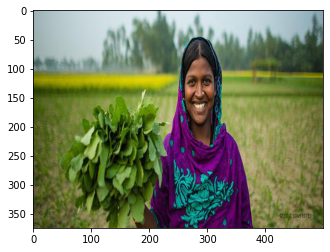

мужчина в красном платье
есть женщина


In [ ]:
captions_from_file(curr_folder + '/MyDrive/NN/Pictures/11.jpg')

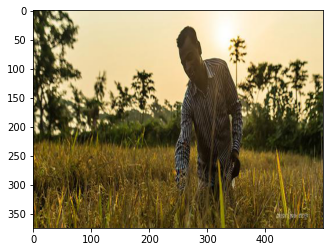

мужчина в рубашке
мужчина сидит на земле


In [ ]:
captions_from_file(curr_folder + '/MyDrive/NN/Pictures/3.jpg')

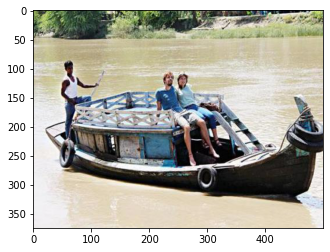

мужчина стоит на лодке
в лодке два человека


In [ ]:
captions_from_file(curr_folder + '/MyDrive/NN/Pictures/586.jpg')

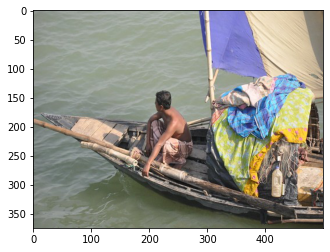

мужчина стоит на берегу реки
мужчина сидит в лодке


In [ ]:
captions_from_file(curr_folder + '/MyDrive/NN/Pictures/1104.jpg')

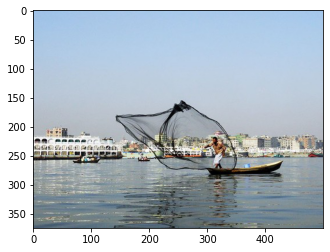

мужчина стоит на берегу
мужчина сидит в лодке


In [ ]:
captions_from_file(curr_folder + '/MyDrive/NN/Pictures/4444.jpg')

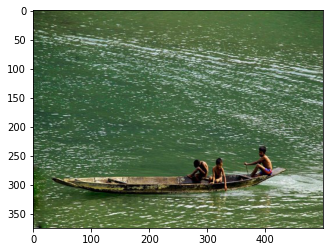

мужчина в лодке
в лодке два человека


In [ ]:
captions_from_file(curr_folder + '/MyDrive/NN/Pictures/7000.jpg')